In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# np.random.seed(0)
Wtrue = np.random.rand(40,5) 
# np.random.seed(0)
Htrue = np.random.rand(5,10)
V0 = Wtrue @ Htrue
m, n = V0.shape  # m= 40, n=10

In [7]:
# Specify the rank
# Construct a low rank matrix  
#
# np.random.seed(0)
# Wtrue = np.random.rand(40,5) 
# np.random.seed(0)
# Htrue = np.random.rand(5,10)
# # Wtrue = np.linspace(0,100,200)
# # Wtrue = np.reshape(Wtrue,(40,5))
# # Htrue = np.linspace(100,200,50)
# # Htrue = np.reshape(Htrue,(5,10))
# V0 = Wtrue @ Htrue
# # print(V0.shape) #40*10
# # Dimensions of data
# #
# m, n = V0.shape  # m= 40, n=10

r = 9;
# Normalise columnwise
#
V = np.zeros((m,n)) #40*10
for i in range(n):
    V[:,i] = V0[:,i] / np.max(V0[:,i])  #  normlaising
# Initialize
#
np.random.seed(0)
W = np.random.rand(m,r);  # T*r  
np.random.seed(0)
H = np.random.rand(r,n);  #r*H
  
MaxIter = 40000
f = np.zeros((MaxIter,1))  # iteration 
# Initial error
#
f[0] = np.linalg.norm(V - W @ H, ord='fro'); #Frobenius norm, 

for iter in range(MaxIter-1):
    #update H
    W_TV = W.T@V
    W_TWH = W.T@W@H 
    for i in range(np.size(H, 0)):
        for j in range(np.size(H, 1)):
            H[i, j] = H[i, j] * W_TV[i, j] / W_TWH[i, j]  #H
    
    # Update W
    VH_T = V@H.T
    WHH_T =  W@H@H.T
    for i in range(np.size(W, 0)):
        for j in range(np.size(W, 1)):
            W[i, j] = W[i, j] * VH_T[i, j] / WHH_T[i, j]  #W
    
    f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')


8.05782555401246e-14


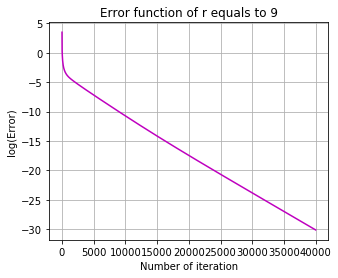

In [8]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.arange(MaxIter), np.log(f), c='m')
ax.set_title("Error function of r equals to 9")
ax.set_xlabel("Number of iteration")
ax.set_ylabel("log(Error)")
ax.grid(True)
print(np.linalg.norm(V - W @ H, ord='fro'))
plt.savefig("err9.png")

In [9]:
print(W.shape)
print(H.shape)

(40, 9)
(9, 10)


In [10]:
X = V
from sklearn.decomposition import NMF
model = NMF(n_components=6, init='random',max_iter=40000,random_state=0,tol = 1.0e-15)
W_sklearn = model.fit_transform(X)
H_sklearn = model.components_

In [11]:
print(W_sklearn.shape)
print(H_sklearn.shape)

(40, 6)
(6, 10)


In [12]:
print(np.linalg.norm(V - W_sklearn @ H_sklearn, ord='fro'))
print(model.n_iter_ )

5.908483438577178e-15
39999


In [13]:
#compare difference of W and W_sklearn
print(np.linalg.norm(W - W_sklearn, ord='fro'))
#compare difference of H and H_sklearn
print(np.linalg.norm(H - H_sklearn, ord='fro'))

ValueError: operands could not be broadcast together with shapes (40,9) (40,6) 

In [14]:
#read data and decomposite 95 assets
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

df = pd.read_excel('Equities.xlsx')
data = np.array(df.drop(labels = ['Name','FTSE100'],axis = 1))
train = data[:983,:]   # split into train and test
test = data[983:,:]

In [15]:
X = train
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random',max_iter=40000,random_state=0,tol = 1.0e-5)
W = model.fit_transform(X)  #T * r
H = model.components_  # r* N


# V0 = train
# m, n = V0.shape  # m= 40, n=10
# r = 10;
# # Normalise columnwise
# #
# V = V0
# # np.zeros((m,n)) #40*10
# # for i in range(n):
# #     V[:,i] = V0[:,i] / np.max(V0[:,i])  #  normlaising
# # Initialize
# #
# np.random.seed(0)
# W = np.random.rand(m,r);  # T*r  
# np.random.seed(0)
# H = np.random.rand(r,n);  #r*H
  
# MaxIter = 4000
# f = np.zeros((MaxIter,1))  # iteration 
# # Initial error
# #
# f[0] = np.linalg.norm(V - W @ H, ord='fro'); #Frobenius norm, 

# for iter in range(MaxIter-1):
#     #update H
#     W_TV = W.T@V
#     W_TWH = W.T@W@H 
#     for i in range(np.size(H, 0)):
#         for j in range(np.size(H, 1)):
#             H[i, j] = H[i, j] * W_TV[i, j] / W_TWH[i, j]  #H
    
#     # Update W
#     VH_T = V@H.T
#     WHH_T =  W@H@H.T
#     for i in range(np.size(W, 0)):
#         for j in range(np.size(W, 1)):
#             W[i, j] = W[i, j] * VH_T[i, j] / WHH_T[i, j]  #W
    
#     f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')


In [16]:
# fig, ax = plt.subplots(figsize=(5,4))
# ax.plot(np.arange(MaxIter), np.log(f), c='m')
# ax.set_title("Error function of r equals to 10")
# ax.set_xlabel("Number of iteration")
# ax.set_ylabel("log(Error)")
# ax.grid(True)
# print(np.linalg.norm(V - W @ H, ord='fro'))
# plt.savefig("ftse100.png")

In [17]:
print(model.reconstruction_err_)
print(model.n_iter_  )

12839.684262272616
11267


In [18]:
# W_d = pd.DataFrame(W)
# df_arr = np.array(df['FTSE100'])
# df_arr = df_arr[:983]
# df_arr = pd.DataFrame(df_arr)
# final = pd.concat([df_arr,W_d],axis = 1,ignore_index = True)
# final.corr()

In [19]:
W_d = pd.DataFrame(W)
index = df['FTSE100'][:983]
final = pd.concat([index,W_d],axis = 1,ignore_index = True)
# final_arr = np.array(final)
# train = final_arr[:983,:]   # split into train and test
# test = final_arr[983:,:]
# train_df = pd.DataFrame(train)
# test_df = pd.DataFrame(test)

In [20]:
final.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.878181,-0.773371,0.612718,-0.772700,0.347815,0.720092,-0.086294,0.219322,0.599180,-0.554983
1,0.878181,1.000000,-0.741249,0.505251,-0.802127,0.238597,0.645003,-0.242026,0.211381,0.660272,-0.516251
2,-0.773371,-0.741249,1.000000,-0.425187,0.604460,-0.462936,-0.459802,0.132174,-0.420616,-0.567196,0.199914
3,0.612718,0.505251,-0.425187,1.000000,-0.492371,-0.182646,0.459893,-0.173773,0.118144,0.224864,-0.393254
4,-0.772700,-0.802127,0.604460,-0.492371,1.000000,-0.310981,-0.499503,-0.106895,-0.261432,-0.500604,0.254660
5,0.347815,0.238597,-0.462936,-0.182646,-0.310981,1.000000,0.301902,-0.073593,-0.090438,0.530661,-0.251279
6,0.720092,0.645003,-0.459802,0.459893,-0.499503,0.301902,1.000000,-0.136775,-0.372810,0.312714,-0.603790
7,-0.086294,-0.242026,0.132174,-0.173773,-0.106895,-0.073593,-0.136775,1.000000,0.002292,-0.604642,0.379061
8,0.219322,0.211381,-0.420616,0.118144,-0.261432,-0.090438,-0.372810,0.002292,1.000000,0.197715,0.207631
9,0.599180,0.660272,-0.567196,0.224864,-0.500604,0.530661,0.312714,-0.604642,0.197715,1.000000,-0.561531


In [21]:
final = np.array(final)

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


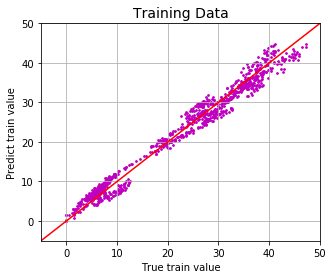

In [22]:
X_train = data[:983,:]
t_train = final[:,1]
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
ll = Lasso(alpha=80)
ll.fit(X_train, t_train)
th_train = ll.predict(X_train)
# th_test = ll.predict(X_test)
alphas_lasso, coefs_lasso,_ = lasso_path(X_train, t_train, fit_intercept=False)
# Plot training and test predictions
#
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(t_train, th_train, c='m', s=3)
ax.plot([-10,50],[-10,50],color = 'r')
ax.set_xlim(-5,50)
ax.set_ylim(-5,50)
ax.set_xlabel("True train value")
ax.set_ylabel("Predict train value")
ax.grid(True)
ax.set_title("Training Data", fontsize=14)

plt.savefig("factorcontribution.png")

In [23]:
wL = ll.coef_ 

In [24]:
wL*100

array([-0.01120408,  0.        , -0.        ,  0.        ,  0.84093672,
        0.74519543, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -1.10275214, -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.47690349, -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.20378527, -0.        , -0.        ,
        0.        , -0.17155061,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  1.07191211, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.332925  , -0.        ,  0.        ,  0.        ,  0.  

In [37]:
weight= []
a = np.where(wL==0)
for i in range(len(wL)):
    if wL[i] !=0:
        weight.append(i)
#         print (name[i+2])
#         print(wL[i])
        print(i)
# ADMIRAL GROUP, ASSOCIATED BRIT.FOODS,ASTRAZENECA,CRODA INTERNATIONAL ,FRESNILLO , IMPERIAL BRANDS , INTERTEK GROUP PADDY POWER BETFAIR RIO TINTO WHITBREAD

0
4
5
22
28
37
41
57
65
91


In [38]:
# cummulative returns
price = 0
for i in weight:
    price = price + test[:,i]*wL[i]

re_factor = (price[-1] -price[0]) / price[0]
print(re_factor)

test_re = np.array(df['FTSE100'][983:])
re_FTSE = (test_re[-1]-test_re[0])/test_re[0]
print(re_FTSE)

-0.1005171978753668
0.018094715922745707


In [27]:
# price

In [28]:
np.corrcoef(price,test_re)

array([[ 1.        , -0.43038672],
       [-0.43038672,  1.        ]])

In [30]:
totle = 0
for i in weight:
    totle = totle + test[:,i]/10
print(np.corrcoef(totle,test_re))
re_ran = (totle[-1]-totle[0])/totle[0]
print(re_ran)

[[1.         0.79315231]
 [0.79315231 1.        ]]
0.21637645998738045


In [ ]:
#performance comparison
#random select 10 assets
num = np.random.randint(1,95,10)
assets = []
for i in range(10):
    assets.append(test[:,num[i]])

In [ ]:
totle = 0
for i in range(10):
    totle =totle+ assets[i]/10

print(np.corrcoef(totle,test_re))

re_ran = (totle[-1]-totle[0])/totle[0]
print(re_ran)